## Code to download CMIP6 bioclim

Download SSP2 and SSP 5 pathways.

Adapted from code: ./src/Data cleaning/240522_psk_GBIF_bolivia.R

In [1]:
library(raster)
library(dismo)
library(maps)
library(sf)

Loading required package: sp

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE



In [3]:
process_cmip6 <- function(path_raw, variables, resolution, ssp_input, model_input, year_input, path_write) {
  bioclim_proj <- geodata::cmip6_world(model = model_input,
                                       var = variables,
                                       res = resolution,
                                       ssp = ssp_input,
                                       time = as.character(year_input),
                                       path = path_raw)
  if (exists("e")) {
    bioclim_proj <- crop(bioclim_proj, e*1.25)  # crop to bg point extent
  }
  else message("extent missing, data not trimmed")
  # write rasters to /data folder
  writeRaster(bioclim_proj,
              filename = paste0(path_write, "_bioclim_proj", names(bioclim_proj), ".tif"), 
              filetype = "GTiff", overwrite = TRUE)
  
  return(bioclim_proj)
}


In [5]:
ls()
getwd()

[1] "process_cmip6"

[1] "/Users/pranavkulkarni/SDM/Climate_Models_Arenaviruses/Src/Data cleaning"

In [6]:
setwd("/Users/pranavkulkarni/SDM/Climate_Models_Arenaviruses")
getwd()

[1] "/Users/pranavkulkarni/SDM/Climate_Models_Arenaviruses"

In [9]:
ssp5 <- process_cmip6(path_raw = tempdir(),
                            variables = "bioc",
                            resolution = 2.5,
                            year_input = "2041-2060",
                            model_input = "IPSL-CM6A-LR",
                            path_write = "./Data/Input/Raw/CMIP6_raw/ssp5",
                            ssp_input = "585")

extent missing, data not trimmed



In [8]:
tempdir()

[1] "/var/folders/rt/5fcqh0ys1bl5412hpn8q4htc0000gn/T//Rtmpnvo6yw"

In [10]:
ssp2 <- process_cmip6(path_raw = tempdir(),
                            variables = "bioc",
                            resolution = 2.5,
                            year_input = "2041-2060",
                            model_input = "IPSL-CM6A-LR",
                            path_write = "./Data/Input/Raw/CMIP6_raw/ssp2",
                            ssp_input = "245")

extent missing, data not trimmed



In [13]:
ssp2
ssp5

class       : SpatRaster 
dimensions  : 4320, 8640, 19  (nrow, ncol, nlyr)
resolution  : 0.04166667, 0.04166667  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source      : wc2.1_2.5m_bioc_IPSL-CM6A-LR_ssp245_2041-2060.tif 
names       : wc2.1~060_1, wc2.1~060_2, wc2.1~060_3, wc2.1~060_4, wc2.1~060_5, wc2.1~060_6, ... 
min values  :       -52.5,        -0.8,        -8.6,         7.9,       -29.2,       -70.3, ... 
max values  :        33.5,        22.0,        96.1,      2308.1,        51.4,        28.1, ... 

class       : SpatRaster 
dimensions  : 4320, 8640, 19  (nrow, ncol, nlyr)
resolution  : 0.04166667, 0.04166667  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source      : wc2.1_2.5m_bioc_IPSL-CM6A-LR_ssp585_2041-2060.tif 
names       : wc2.1~060_1, wc2.1~060_2, wc2.1~060_3, wc2.1~060_4, wc2.1~060_5, wc2.1~060_6, ... 
min values  :       -52.0,        -1.1,       -12.0,         8.6,       -28.8,       -69.1, ... 
max values  :        34.1,        22.1,        95.1,      2285.7,        52.1,        28.6, ... 

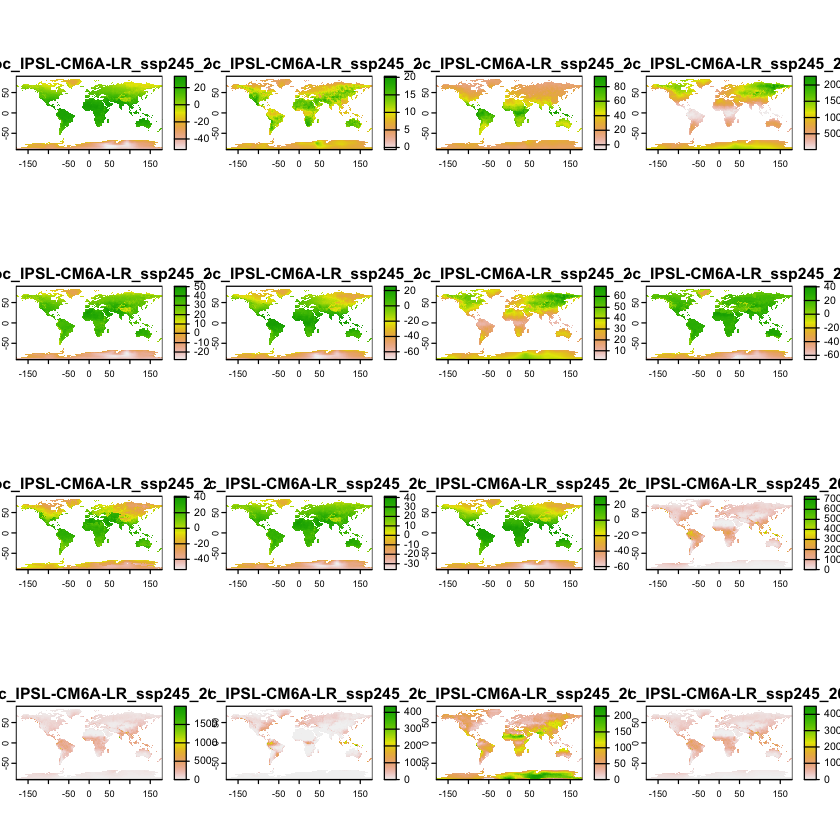

In [28]:

terra::plot(ssp2)

### Crop and write rasters for each arenavirus

In [17]:
ref_machu = raster("./Data/Input/Processed/Resampled/machu/wclim_2.5_machupo1.asc")
ref_junin = raster("./Data/Input/Processed/Resampled/junin/Current/bclim01.tif")
ref_guan = raster("./Data/Input/Processed/Resampled/guan/bclimwc2.1_2.5m_bio_1.tif")
e_machu = extent(ref_machu)
e_junin = extent(ref_junin)
e_guan = extent(ref_guan)
e_machu
e_junin 
e_guan

class      : Extent 
xmin       : -71.75 
xmax       : -54.25 
ymin       : -24.75 
ymax       : -7.25 

class      : Extent 
xmin       : -76.08333 
xmax       : -51.20833 
ymin       : -59.25 
ymax       : -17.625 

class      : Extent 
xmin       : -84.75 
xmax       : -47.25 
ymin       : -4.375 
ymax       : 14.375 

In [18]:
crop_process = function(rast_spat, extent, path_write, ssp) {
    rast_processed = crop(rast_spat, extent*1.25)
    writeRaster(rast_processed,
              filename = paste0(path_write, ssp, names(rast_processed), ".tif"), 
              filetype = "GTiff", overwrite = TRUE)
}

ssp5_machu <- crop_process(ssp5, e_machu, "./Data/Input/Processed/Projected/machu/SSP5/", "ssp5")
ssp2_machu <- crop_process(ssp2, e_machu, "./Data/Input/Processed/Projected/machu/SSP2/", "ssp2")
ssp5_guan <- crop_process(ssp5, e_guan, "./Data/Input/Processed/Projected/guan/SSP5/", "ssp5")
ssp2_guan <- crop_process(ssp2, e_guan, "./Data/Input/Processed/Projected/guan/SSP2/", "ssp2")
ssp5_junin <- crop_process(ssp5, e_junin, "./Data/Input/Processed/Projected/junin/SSP5/", "ssp5")
ssp2_junin <- crop_process(ssp2, e_junin, "./Data/Input/Processed/Projected/junin/SSP2/", "ssp2")


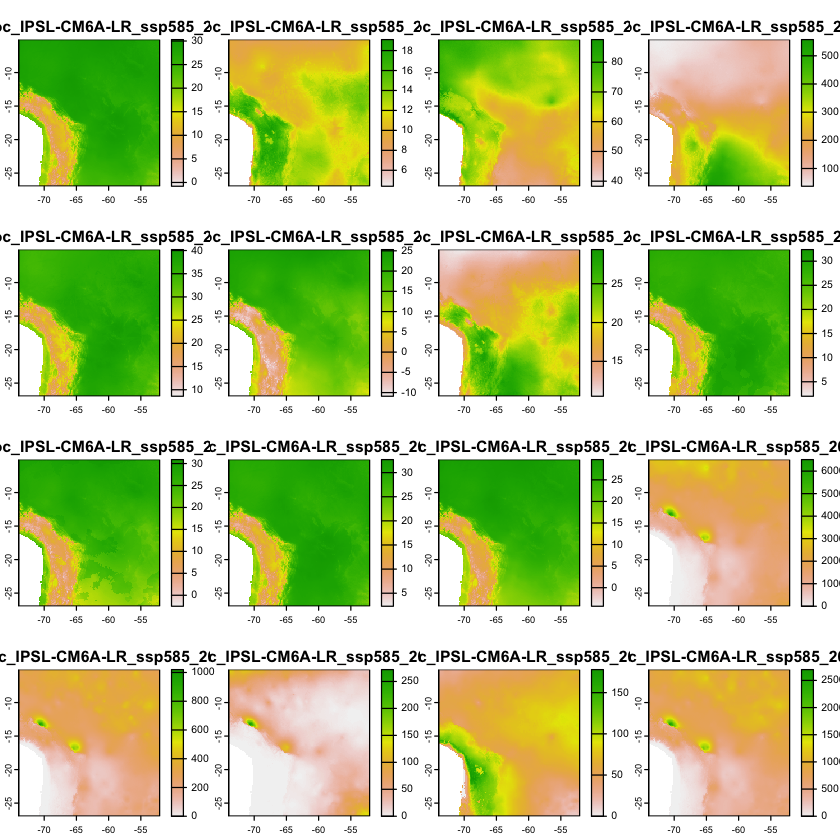

In [23]:
terra::plot(ssp5_machu)

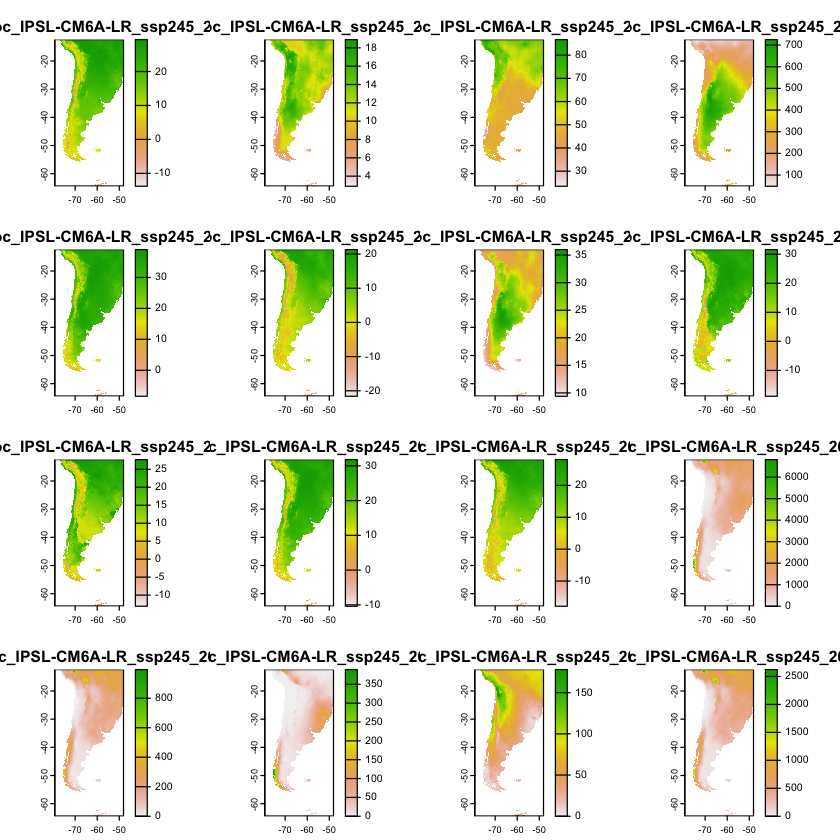

In [26]:
terra::plot(ssp2_junin)